# Recurrent Neural Networks

Text processing tasks benefit from recursive networks that implement "memory". Here apply both an RNN and an LSTM to the [IMDB dataset](https://keras.io/datasets/#imdb-movie-reviews-sentiment-classification).

This example is taken from [*Deep Learning with Python*](https://github.com/fchollet/deep-learning-with-python-notebooks), F. Chollet, 2018, Section 6.2. 

We start by loading the IMDB dataset.

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


## Simple RNNs

Configure and train a simple RNN.

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 16s 782us/step - loss: 0.6386 - acc: 0.6181 - val_loss: 0.5127 - val_acc: 0.7756
Epoch 2/10
20000/20000 [==============================] - 16s 783us/step - loss: 0.4114 - acc: 0.8246 - val_loss: 0.4147 - val_acc: 0.8170
Epoch 3/10
20000/20000 [==============================] - 15s 766us/step - loss: 0.3164 - acc: 0.8728 - val_loss: 0.3596 - val_acc: 0.8422
Epoch 4/10
20000/20000 [==============================] - 15s 750us/step - loss: 0.2571 - acc: 0.8988 - val_loss: 0.3793 - val_acc: 0.8348
Epoch 5/10
20000/20000 [==============================] - 15s 754us/step - loss: 0.2060 - acc: 0.9228 - val_loss: 0.7428 - val_acc: 0.7750
Epoch 6/10
20000/20000 [==============================] - 15s 756us/step - loss: 0.1606 - acc: 0.9420 - val_loss: 0.3565 - val_acc: 0.8706
Epoch 7/10
20000/20000 [==============================] - 15s 755us/step - loss: 0.1376 - acc: 0.9515 - val_loss: 0.3

Plot the results.

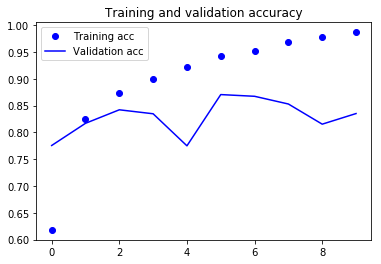

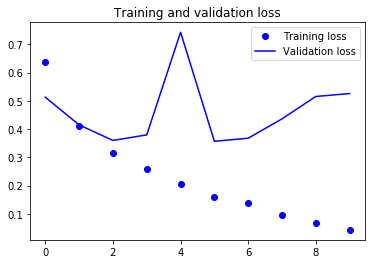

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

This gets around 85% accuracy. This isn't as good as a non-recurrent, baseline system, 
which gets around 88%. 

## Long Short-Term Memory (LSTM) Models

We now try an LSTM, a more capable RNN formulation.

In [7]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.5216 - acc: 0.7543 - val_loss: 0.5105 - val_acc: 0.7356
Epoch 2/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.3006 - acc: 0.8805 - val_loss: 0.3296 - val_acc: 0.8596
Epoch 3/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.2343 - acc: 0.9091 - val_loss: 0.3592 - val_acc: 0.8688
Epoch 4/10
20000/20000 [==============================] - 47s 2ms/step - loss: 0.1984 - acc: 0.9257 - val_loss: 0.6784 - val_acc: 0.8046
Epoch 5/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.1750 - acc: 0.9365 - val_loss: 0.3420 - val_acc: 0.8826
Epoch 6/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.1570 - acc: 0.9426 - val_loss: 0.4066 - val_acc: 0.8444
Epoch 7/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.1426 - acc: 0.9501 - val_loss: 0.6949 - val_acc:

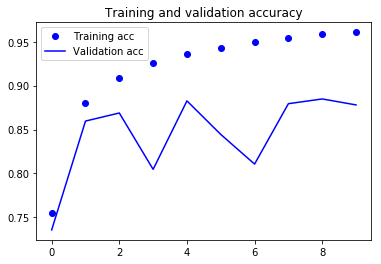

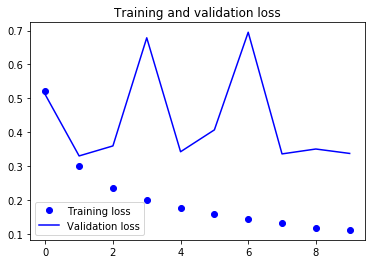

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

This gets around 89%, which is better, but not that much better, than the non-RNN baseline.